CUSTOMER PURCHASE BEHAVIOR ANALYSIS USING DESCRIPTIVE STATISTICS

In [18]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)


In [19]:
# Load dataset
tips = sns.load_dataset("tips")

# Preview data
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
print("Dataset Info:\n")
print(tips.info())

print("\nSummary Statistics:\n")
print(tips.describe())

# Identify variable types
quantitative = tips.select_dtypes(include=np.number).columns.tolist()
qualitative = tips.select_dtypes(exclude=np.number).columns.tolist()

print("\nQuantitative Variables:", quantitative)
print("Qualitative Variables:", qualitative)


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None

Summary Statistics:

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

Quantitative Variables: ['total_bi

In [21]:
# Check missing values
print("Missing values:\n", tips.isnull().sum())

# Remove missing rows if any
tips = tips.dropna()

# Check for invalid values
print("\nMinimum values:\n", tips[['total_bill', 'tip', 'size']].min())


Missing values:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Minimum values:
 total_bill    3.07
tip           1.00
size          1.00
dtype: float64


In [22]:
variables = ['total_bill', 'tip', 'size']

for var in variables:
    print(f"\nCentral Tendency for {var}:")
    print("Mean:", tips[var].mean())
    print("Median:", tips[var].median())
    print("Mode:", tips[var].mode()[0])



Central Tendency for total_bill:
Mean: 19.78594262295082
Median: 17.795
Mode: 13.42

Central Tendency for tip:
Mean: 2.99827868852459
Median: 2.9
Mode: 2.0

Central Tendency for size:
Mean: 2.569672131147541
Median: 2.0
Mode: 2


In [23]:
print("\nCentral tendency by gender:")
print(tips.groupby('sex', observed=True)[['total_bill','tip','size']].mean())

print("\nCentral tendency by day:")
print(tips.groupby('day', observed=True)[['total_bill','tip','size']].mean())



Central tendency by gender:
        total_bill       tip      size
sex                                   
Male     20.744076  3.089618  2.630573
Female   18.056897  2.833448  2.459770

Central tendency by day:
      total_bill       tip      size
day                                 
Thur   17.682742  2.771452  2.451613
Fri    17.151579  2.734737  2.105263
Sat    20.441379  2.993103  2.517241
Sun    21.410000  3.255132  2.842105


In [24]:
def dispersion_stats(data, column):
    print(f"\nDispersion for {column}:")
    print("Range:", data[column].max() - data[column].min())
    print("Variance:", data[column].var())
    print("Standard Deviation:", data[column].std())
    print("IQR:", data[column].quantile(0.75) - data[column].quantile(0.25))

dispersion_stats(tips, 'total_bill')
dispersion_stats(tips, 'tip')



Dispersion for total_bill:
Range: 47.74
Variance: 79.25293861397826
Standard Deviation: 8.902411954856856
IQR: 10.779999999999998

Dispersion for tip:
Range: 9.0
Variance: 1.9144546380624725
Standard Deviation: 1.3836381890011826
IQR: 1.5625


In [25]:
spread = pd.DataFrame({
    "Variance": [tips['total_bill'].var(), tips['tip'].var()],
    "Std Dev": [tips['total_bill'].std(), tips['tip'].std()]
}, index=["total_bill", "tip"])

print("\nSpread comparison:")
print(spread)



Spread comparison:
             Variance   Std Dev
total_bill  79.252939  8.902412
tip          1.914455  1.383638


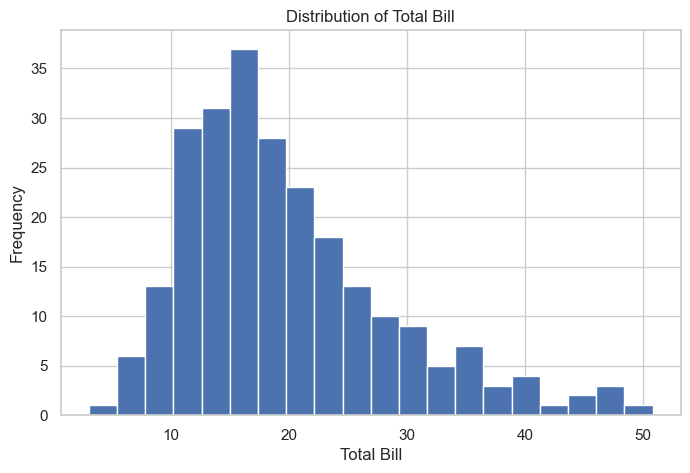

In [26]:
plt.hist(tips['total_bill'], bins=20)
plt.title("Distribution of Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Frequency")
plt.show()


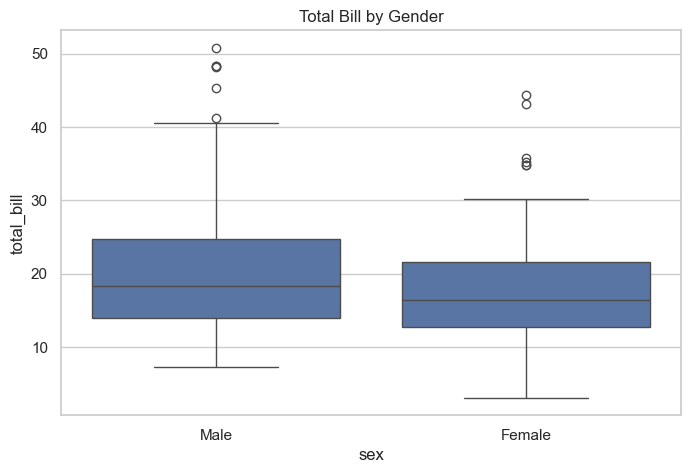

In [27]:
sns.boxplot(x='sex', y='total_bill', data=tips)
plt.title("Total Bill by Gender")
plt.show()


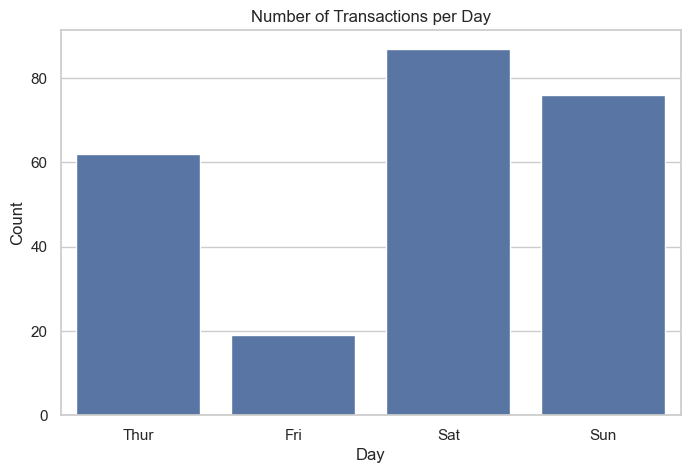

In [28]:
sns.countplot(x='day', data=tips)
plt.title("Number of Transactions per Day")
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()


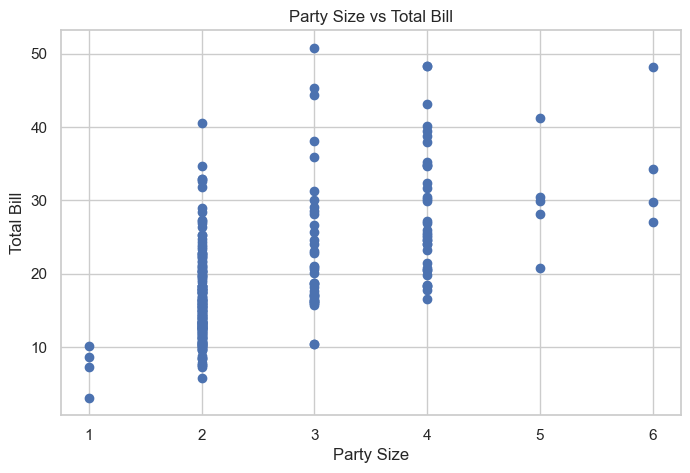

In [29]:
plt.scatter(tips['size'], tips['total_bill'])
plt.title("Party Size vs Total Bill")
plt.xlabel("Party Size")
plt.ylabel("Total Bill")
plt.show()


In [30]:
corr_tb_tip = tips['total_bill'].corr(tips['tip'])
corr_tb_size = tips['total_bill'].corr(tips['size'])

print("Correlation between total_bill and tip:", corr_tb_tip)
print("Correlation between total_bill and size:", corr_tb_size)


Correlation between total_bill and tip: 0.6757341092113641
Correlation between total_bill and size: 0.5983151309049022


In [31]:
def interpret_corr(value, var1, var2):
    if abs(value) < 0.3:
        strength = "weak"
    elif abs(value) < 0.7:
        strength = "moderate"
    else:
        strength = "strong"
        
    direction = "positive" if value > 0 else "negative"
    
    print(f"The correlation between {var1} and {var2} is {strength} and {direction}.")

interpret_corr(corr_tb_tip, "total_bill", "tip")
interpret_corr(corr_tb_size, "total_bill", "size")


The correlation between total_bill and tip is moderate and positive.
The correlation between total_bill and size is moderate and positive.


In [32]:
tips.to_csv("cleaned_tips_data.csv", index=False)


Project Summary

Key Findings:

1. The average total bill is around the mean value calculated above, indicating typical customer spending.
2. Median values are close to means, suggesting a moderately symmetric distribution.
3. Tips increase as the total bill increases, showing a positive correlation.
4. Larger party sizes generally lead to higher total bills.
5. Spending varies slightly across days and genders.
6. The boxplot shows some high-spending outliers.

Business Insights:

1. Larger groups are high-value customers → target them with group offers.
2. Peak transaction days can be used for promotions.
3. High-spending outliers indicate premium customers → potential loyalty programs.